In [1]:
from candidate_triplets import select_top10_triplets_for_single_pheno
from causality_test import analyze_folder
from add_vectors_to_LRC import extract_triplet_vectors
from pathlib import Path
import plotter

candidate_triplets = select_top10_triplets_for_single_pheno(
        qtl_eqtl_merged_path="data/final-merge/final-mergeqtl_eqtl_with_eqtl_coords.csv",
        output_path="data/top10_triplets_787.csv",
        prefer_cis=True,
        prefer_same_chr=True,
        n_triplets=10,      # final 10
        n_candidates=15,    # first 15, then unique SNPs, then 10
        min_logp=None       # or 1.3 for ~p<=0.05
    )



[OK] Wrote 10 triplets to: data/top10_triplets_787.csv


In [2]:
BASE = Path("data")  

extract_triplet_vectors(
    top_triplets_csv= BASE / "top10_triplets_787.csv",
    expr_liver_csv=BASE / "filtered_expression_matrix_liver.csv",
    expr_hypo_csv=BASE / "filtered_expression_matrix_hypothalamus.csv",
    geno_liver_csv=BASE / "filtered_genotype_matrix_liver.csv",
    geno_hypo_csv=BASE / "filtered_genotype_matrix_hypothalamus.csv",
    phenotypes_csv=BASE / "phenotypes.csv",
    pheno_id=787,
    out_dir=BASE / "triplet_vectors",
    summary_csv=BASE / "triplets_vector_summary.csv",
)

[OK] Wrote per-triplet vectors to 'data\triplet_vectors/' and summary to 'data\triplets_vector_summary.csv'


In [3]:

final_results = analyze_folder(BASE, "triplet_vectors", n_perm=1000, savefile="causality_results.csv")



✅ Summary saved to data\causality_results.csv


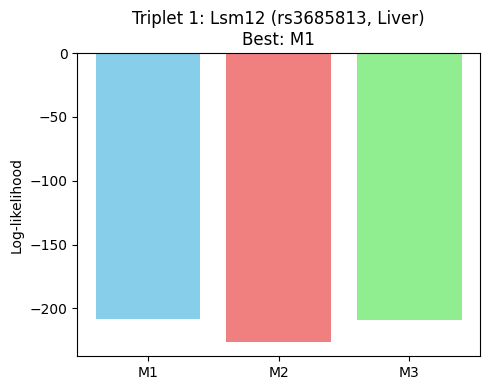

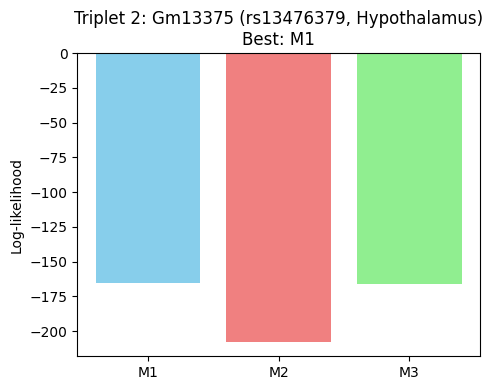

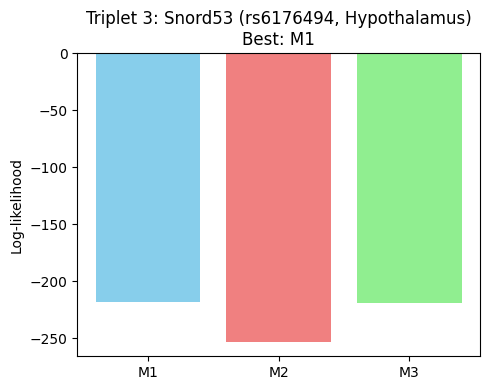

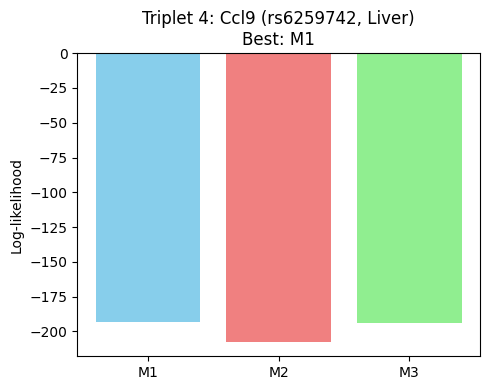

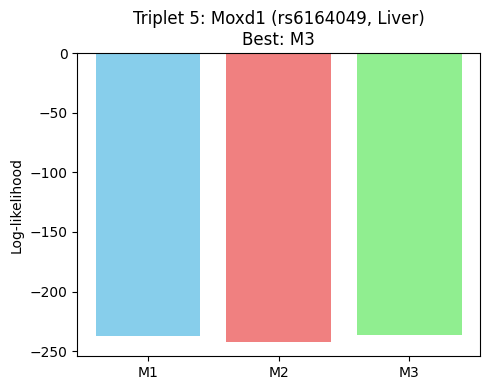

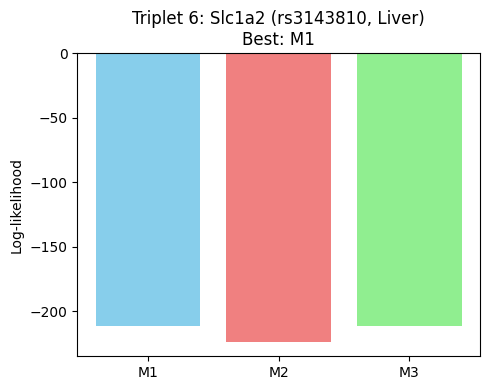

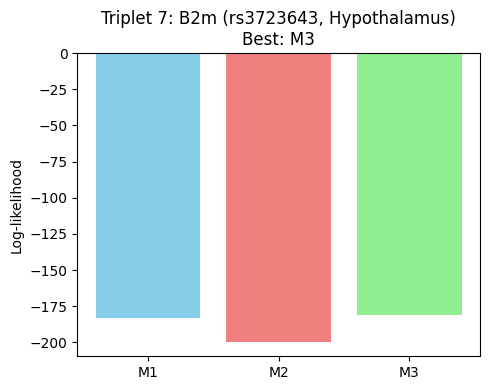

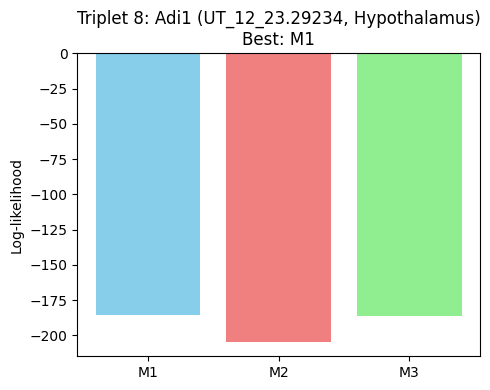

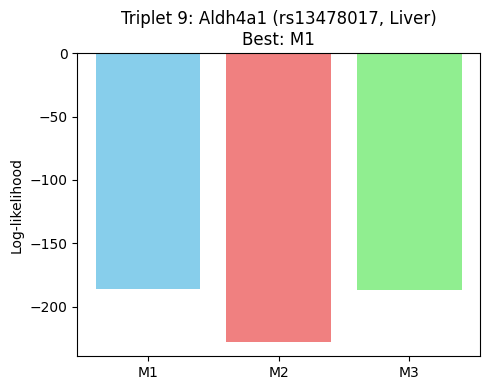

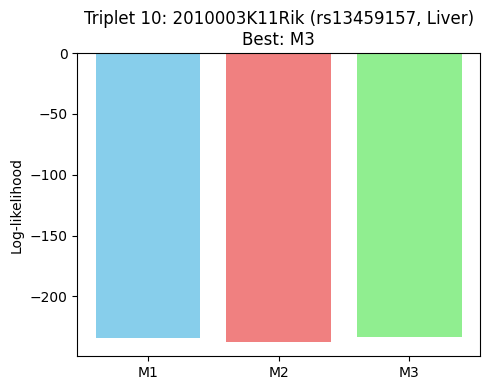

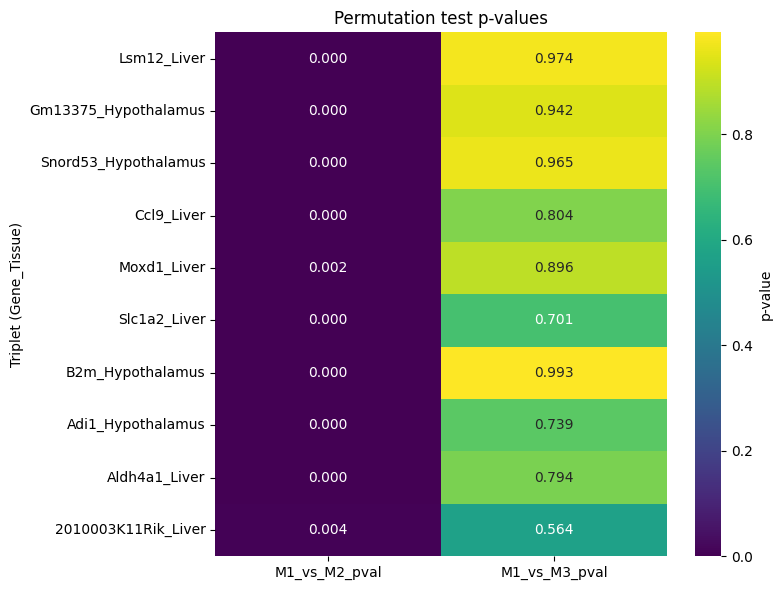

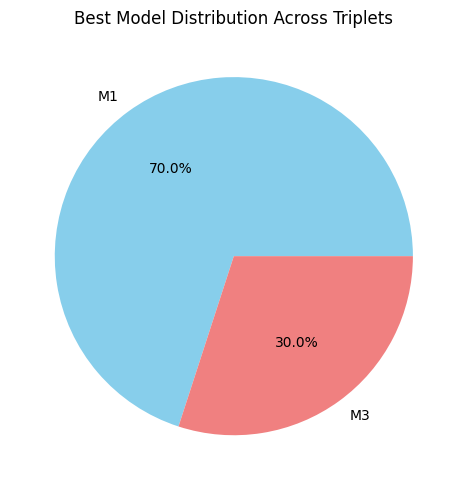

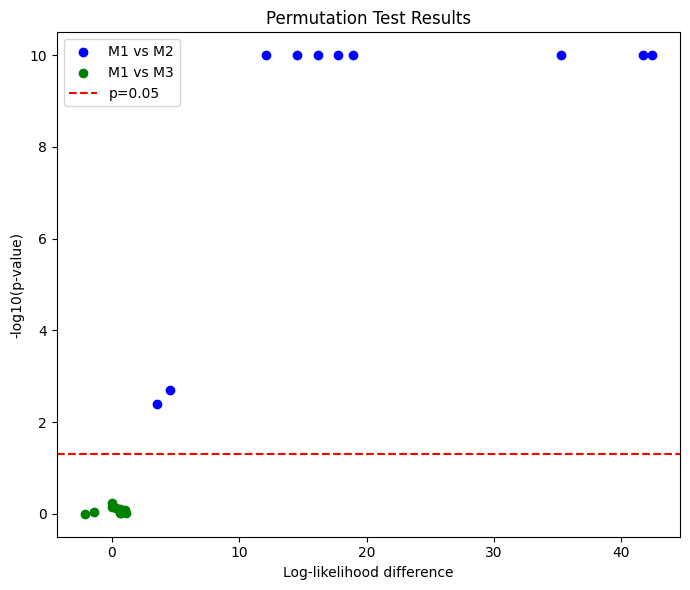

In [4]:
# Run after you created df_summary
plotter.plot_likelihoods(final_results, outdir="plots")
plotter.plot_pvalue_heatmap(final_results, outdir="plots")
plotter.plot_model_preference(final_results, outdir="plots")
plotter.plot_volcano(final_results, outdir="plots")
